In [58]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
company=pd.read_csv("A:/Data Science/assignments/Desicion/Company_Data.csv")

In [3]:
company.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [122]:
company.shape

(400, 11)

In [ ]:
company.Sales

In [4]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


{'whiskers': [<matplotlib.lines.Line2D at 0x2a86936a390>,
 'caps': [<matplotlib.lines.Line2D at 0x2a86936ab38>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a86936a208>],
 'medians': [<matplotlib.lines.Line2D at 0x2a8693722e8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a8693726a0>],
 'means': []}

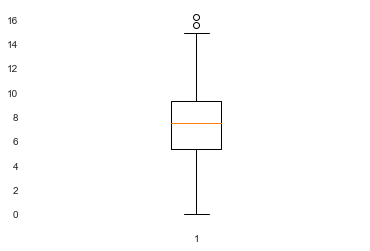

In [124]:
plt.boxplot(company.Sales)

In [5]:
company.Sales.describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [7]:
group=np.where(company['Sales']>=8,'High','less')
company['group']=group

In [9]:
company.group.value_counts()

less    236
High    164
Name: group, dtype: int64

In [10]:
del company ['Sales']

In [11]:
company.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,group
0,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,117,100,4,466,97,Medium,55,14,Yes,Yes,less
4,141,64,3,340,128,Bad,38,13,Yes,No,less


In [190]:
company.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Shelfloc,Urban,US
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955,0.157470,-0.015419,0.177093
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197,0.023350,0.066594,0.016869
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855,-0.067678,0.037967,0.089601
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594,0.008544,0.042035,0.684460
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378,-0.044772,-0.052025,0.060564
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747,0.014633,0.047016,0.057861
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488,0.056488,0.028479,0.008652
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000,0.001492,-0.033094,-0.078250
Shelfloc,0.157470,0.023350,-0.067678,0.008544,-0.044772,0.014633,0.056488,0.001492,1.000000,-0.063978,-0.039760
Urban,-0.015419,0.066594,0.037967,0.042035,-0.052025,0.047016,0.028479,-0.033094,-0.063978,1.000000,0.047085


In [129]:
prof=ProfileReport(company,title='Pandas Profiling Report', html={'style':{'full_width':True}})


In [130]:
prof.to_widgets()

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
lab=LabelEncoder()
shelf=lab.fit_transform(company.ShelveLoc)
urb=lab.fit_transform(company.Urban)
country=lab.fit_transform(company.US)


In [20]:
company.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,group,Shelfloc,Urban,US
0,138,73,11,276,120,42,17,High,0,1,1
1,111,48,16,260,83,65,10,High,1,1,1
2,113,35,10,269,80,59,12,High,2,1,1
3,117,100,4,466,97,55,14,less,2,1,1
4,141,64,3,340,128,38,13,less,0,1,0


In [17]:
del company['ShelveLoc']

In [18]:
company['Shelfloc']=shelf
company['Urban']=urb
company['US']=country

In [19]:
company.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education', 'group', 'Shelfloc', 'Urban', 'US'],
      dtype='object')

In [144]:
company.dtypes

Sales           float64
CompPrice         int64
Income            int64
Advertising       int64
Population        int64
Price             int64
Age               int64
Education         int64
slice          category
Shelfloc          int32
Urban             int32
US                int32
dtype: object

In [21]:
X=company[[ 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education','Shelfloc', 'Urban', 'US']]
y=company[['group']]

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
model=DecisionTreeClassifier(criterion='entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [50]:
model.score(x_test,y_test)

0.75

In [51]:
model.score(x_train,y_train)

1.0

In [84]:
#Model is overfitting so applying Bagging

In [56]:
from sklearn.ensemble import BaggingClassifier

In [64]:
clf=BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini'),n_estimators=10,random_state=1).fit(x_train,y_train)

In [65]:
predict_values=clf.predict(x_test)

In [66]:
clf.score(x_test,y_test)

0.8625

In [73]:
from sklearn.metrics import confusion_matrix,accuracy_score


In [83]:
confusion_matrix(y_test,predict_values)

array([[25,  2],
       [ 9, 44]], dtype=int64)

In [ ]:
#The score of this model is 86% after bagging technique